In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # correlation-matrix heatmap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler # Standardization
from sklearn.neighbors import KNeighborsClassifier # KNN-Classifier
from sklearn import metrics #  for evaluation of classifier




df.isnull().sum(), gibt die Anzahl der NaN Einträge jeder Spalte an

In [2]:
df = pd.read_csv('C:/Users/Lukas/Desktop/Kaggle_Titanic/train.csv')
df.head(5)
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Dropna (axis=1 , thresh = 300) drops all columns that have less than 300 true values (= cabin column dropped), because over 600 NaN is way too much

In [3]:
df = df.dropna(axis=1, thresh = 300)

df.fillna(df.mean()) fills up missing values with the mean value of that colum -> in my case fill up the values of the "Age" colum
df.dropna(axis = 0) drops all rows with missing values -> In this case 2 rows are dropped were the Embarked value is missing

Also drop Pclass,Names,Ticket and Embarked -column, becuase logically they don't have anything to do with survival or Pclass should be calculated by Fare

#### To see how Fare and Pclass are related -> Plot

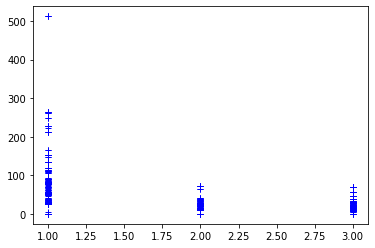

In [4]:
fare = df['Fare'].values
Pclass = df['Pclass'].values
plt.plot(Pclass , fare, 'b+')
plt.show()

It seems that the fares for 2nd and 3rd class are almost identical, and therefore it seems to make more sense to use Pclass as a indicator.

['0.4 - 13.7', '13.7 - 26.9', '26.9 - 40.2', '40.2 - 53.5', '53.5 - 66.7', '66.7 - 80.0']


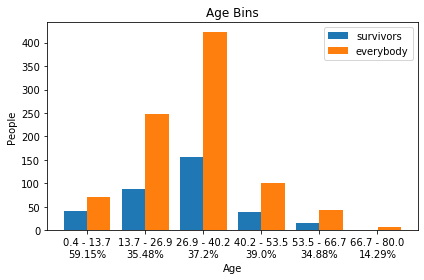

In [5]:
df = df.fillna(df.median())
bns = 6
survived = df['Survived'] == 1

fig, ax = plt.subplots()
(n, bins, patches) = ax.hist([df['Age'][survived], df['Age']], bins= bns , label=['survivors', 'everybody'])
ax.legend()
ax.set_xlabel('Age')
ax.set_ylabel('People')
ax.set_title('Age Bins')

percentage = []
for i in range(0,len(n[0])):
    percentage.append(n[0][i]/n[1][i])
bins = [round(bins[i], 1) for i in range(0,len(bins))]
labels_percentage = [round(percentage[x]*100,2) for x in range(0,len(percentage))]
bins_ticks_loc = [(bins[i]+bins[i+1])/2 for i in range(0,len(bins)-1)]
labels_bins = [str(bins[i]) + str(" - ") + str(bins[i+1]) for i in range(0,len(bins)-1)]
print(labels_bins)
xticks_double = [labels_bins[i] + "\n" + str(labels_percentage[i]) + "%" for i in range(0,len(bins)-1)]
#ax.set_xticks(np.arange(min(bins),max(bins),(max(bins)-min(bins))/6))
ax.set_xticks(bins_ticks_loc)
ax.set_xticklabels(xticks_double)
plt.tight_layout()
#ax.set_xticks(np.arange(min(bins),max(bins),(max(bins)-min(bins))/6), ("a","b","c","d","e","f"))
#print(np.arange(min(bins),max(bins),(max(bins)-min(bins))/6))





## Investigate if the "quality" and the amount of family members on the ship help you survive

Make both SibSp and Parch binary (1= has members/friends, 0= travelling alone)
Then see each's survival rate

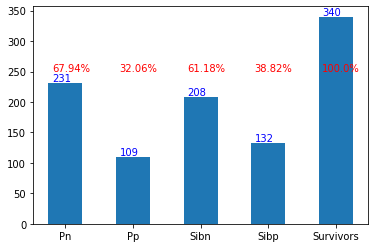

In [60]:
# Barchart mit Parch Anzahl und Leuten die Survived
#Select Survived
df['Parch'].value_counts()# The maximum is 6, so 7 unique values
df['SibSp'].value_counts()
# Because of very low amount of people having more than 2 members on board -> 
#creating new Series (Parch_binary, Sib_Sp) 
# where 1 = 1 or more members, and 0 = 0 members
df["Parch_binary"] = df.Parch.map({0 :0 , 1:1 , 2:1 , 3:1 , 4:1 , 5:1 ,6:1}) 
df['SibSp_binary'] = df.SibSp.map({0 :0 , 1:1 , 2:1 , 3:1 , 4:1 , 5:1, 8:1})
# Erstellen einer neuen Series mit
#0: keine Mitglieder 1: 1 oder mehr Mitglieder
survived = df['Survived'] == 1
not_survived = df['Survived'] == 0
pp = df['Parch_binary'] == 1
pn = df['Parch_binary'] == 0
sibp = df['SibSp_binary'] == 1
sibn = df['SibSp_binary'] == 0
survived_count = df[survived].count()[0]
not_survived_count = df[not_survived].count()[0]

# Calculate survival percentage for each Parch-class
# needed: Total amount of people with certain parch number + amount of Survivors with that parch number
# Total amount: 
fig, ax = plt.subplots()

bar_data = {"Pn": df['Parch_binary'][survived][pn].count(), "Pp": df['Parch_binary'][survived][pp].count() ,
            "Sibn" : df['SibSp_binary'][survived][sibn].count(), "Sibp" : df["SibSp_binary"][survived][sibp].count(),
            "Survivors" : df['Survived'][survived].count()}
plot_data = [bar_data[dic] for dic in bar_data]
plot_percentage = [i/bar_data["Survivors"] for i in plot_data]
plot_percentage = [round(i*100,2) for i in plot_percentage]
plot_labels = [label for label in bar_data]

plt.bar([1,2,3,4,5] , height = plot_data, width=0.5 , tick_label = plot_labels)
for i, v in enumerate(plot_data):
    plt.text(i + 0.8, v + 3 , str(v), color='blue')
for i, v in enumerate(plot_percentage):
    plt.text(i + 0.8, 250 , str(v) + "%", color="red")






#print(parch_list)
#plt.bar(range(0,7),parch_list, width= 0.3 )
#plt.bar(range(0,7), parch_list_surv, width=0.3, color = "r")
#plt.show()
#df['Sib_binary'].value_counts()
#pd.pivot_table(df ,values = ['Survived'], index = ['Sib_binary'], columns = ['Parch_binary'], aggfunc = 'mean')

In [7]:
df_pivot = df[['Survived', 'SibSp', 'Parch']]
pd.pivot_table(df_pivot, index='Survived', columns ='Parch')

df_pivot['SibSp'].value_counts()
#df_pivot['Parch_binary'] = 0
#df_pivot['SibSp_binary'] = 0
#df_pivot['Parch_binary'][df_pivot['Parch'] >= 1] = 1
#df_pivot['SibSp_binary'][df_pivot['SibSp'] >= 1] = 1
df_pivot= df_pivot.drop(['Parch','SibSp'],axis =1)

subset_df = df_pivot[df_pivot["Survived"] == 1]



In [8]:

df = df.dropna(axis=0)
df = df.drop(columns =['Ticket','Name','Embarked', 'PassengerId','Fare'])
df = pd.get_dummies(df, drop_first = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived        889 non-null int64
Pclass          889 non-null int64
Age             889 non-null float64
SibSp           889 non-null int64
Parch           889 non-null int64
Parch_binary    889 non-null int64
Sib_binary      889 non-null int64
Sex_male        889 non-null uint8
dtypes: float64(1), int64(6), uint8(1)
memory usage: 56.4 KB


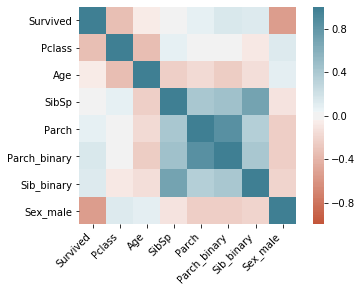

In [9]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [10]:
df.var()

Survived          0.236448
Pclass            0.696724
Age             168.608467
SibSp             1.218164
Parch             0.650863
Parch_binary      0.182394
Sib_binary        0.217242
Sex_male          0.228042
dtype: float64

# Splitting Data into Training- and Test sets
First: Split into Predictor (X) and target (y) variables
Second: Split into train and test sets
Third: Standardize data, so that colums with bigger values like Fare don't dominate the kNN- distance measurement

In [11]:
# Split
X,y = df.drop('Survived', axis=1).values , df['Survived'].values
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.3, random_state =42, stratify =y)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

# Standardize

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)



Train set: (622, 7) (622,)
Test set: (267, 7) (267,)


# Defining KNN-Classifier and choosing the right K

Main advantage: Classifier instantly adapts to new data

Disadvantage: However, the downside is that
the computational complexity for classifying new examples grows linearly with the
number of examples in the training dataset in the worst-case scenario—unless the
dataset has very few dimensions (features) and the algorithm has been implemented
using efficient data structures such as k-d trees
and
Since the data has to be stored in order for the classifiert to work, can take up alot of storage if dataset gets huge


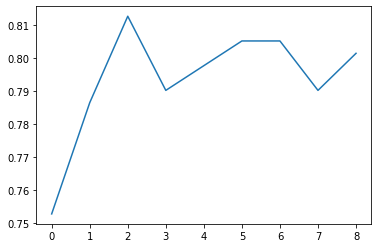

3
[0.75280899 0.78651685 0.81273408 0.79026217 0.79775281 0.80524345
 0.80524345 0.79026217 0.80149813]
0.8052434456928839


In [12]:
# Figuring out the best number for neighbors by running k from 1 to 10 and evaluating the score 
#with the metrics.accuracy_score function
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    knn = KNeighborsClassifier(n_neighbors=n, p=2, metric='minkowski');
    knn.fit(X_train_std, y_train);
    yhat = knn.predict(X_test_std);
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(mean_acc)
plt.show()

# best results for k = 7
mean_acc.argmax()+1 # weil k=1 and 0ter Stelle des arrays steht
print(mean_acc.argmax()+1)
print(mean_acc)
print(mean_acc[6])




# To submit it, we use the whole train datafile as training set and use k=7

In [13]:


#split into train x and y
X_train_sub , y_train_sub = df.drop(columns =['Survived'] , axis=1).values , df['Survived'].values

#standardize
stdsc = StandardScaler()
X_train_sub_std = stdsc.fit_transform(X_train_sub)

#train 
neigh = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski');
neigh.fit(X_train_sub_std, y_train_sub)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [14]:
# prepare Test-dataset
df_sub = pd.read_csv('C:/Users/Lukas/Desktop/Kaggle_Titanic/test.csv')
df_sub = df_sub.dropna(axis=1, thresh = 300)
df_sub = df_sub.fillna(df_sub.mean())
df_sub = df_sub.dropna(axis=0)
df_sub = df_sub.drop(columns =['Ticket','Name','Embarked', 'PassengerId','Pclass'])
df_sub = pd.get_dummies(df_sub, drop_first = True)
df_sub.info()

#standardize
X_test_sub_std = stdsc.fit_transform(df_sub.values)

y_submit = neigh.predict(X_test_sub_std)

print(y_submit)
test = y_submit.astype(int)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 5 columns):
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Sex_male    418 non-null uint8
dtypes: float64(2), int64(2), uint8(1)
memory usage: 16.7 KB


ValueError: query data dimension must match training data dimension

In [ ]:
# prepare submission
get_ID = pd.read_csv('C:/Users/Lukas/Desktop/Kaggle_Titanic/gender_submission.csv')
submission_data = {'PassengerId' : get_ID['PassengerId'].values,
                    'Survived' : y_submit}
df_submission = pd.DataFrame(submission_data, columns = ['PassengerId' , 'Survived'])
df_submission.head()
df_submission.to_csv('C:/Users/Lukas/Desktop/Kaggle_Titanic/submission_KNN.csv', index=False)